### Train a neural network with TensorFlow

* STEP 1: Import the data
* STEP 2: Transform the data
* STEP 3: Construct the tensor
* STEP 4: Build the model 
* STEP 5: Train and evaluate the model
* STEP 6: Improve the model

#### STEP 1: Import the data

In [6]:
import tensorflow as tf
# from sklearn.datasets import fetch_mldata
from tensorflow.examples.tutorials.mnist import input_data
# from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1337)

In [7]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
single_image = mnist.train.images[1].reshape(28,28)

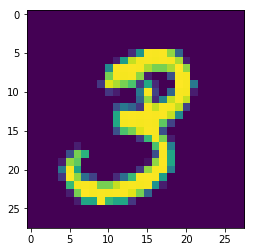

In [11]:
plt.imshow(single_image)

#### STEP 2: Transform the data

#### STEP 3: Construct the tensor

In [36]:
feature_columns = [tf.feature_column.numeric_column('x', shape=39200)]

In [37]:
feature_columns

[_NumericColumn(key='x', shape=(39200,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

#### STEP 4: Build the model 

In [38]:
estimator = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[300,100],
    n_classes=10,
    model_dir='/train/DNN'
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/train/DNN', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000000123742E8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### STEP 5: Train and evaluate the model

In [39]:
X_train, y_train = mnist.train.next_batch(50)
X_test, y_test = mnist.test.next_batch(50)


In [40]:
# Train the estimator
train_input =tf.estimator.inputs.numpy_input_fn(
    x={"x":X_train},
    y=y_train,
    batch_size=50,
    shuffle=False,
    num_epochs=None)

estimator.train(input_fn=train_input,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Cannot reshape a tensor with 39200 elements to shape [50,39200] (1960000 elements) for 'dnn/input_from_feature_columns/input_layer/x/Reshape' (op: 'Reshape') with input shapes: [50,784], [2] and with input tensors computed as partial shapes: input[1] = [50,39200].

In [41]:
eval_input = tf.estimator.inputs.numpy_input_fn(
    x={'x': X_test},
    y=y_test,
    shuffle=False,
    batch_size=X_test.shape[0],
    num_epochs=1
)

estimator.evaluate(eval_input,steps=None)

INFO:tensorflow:Could not find trained model in model_dir: /train/DNN, running initialization to evaluate.
INFO:tensorflow:Calling model_fn.


ValueError: Mismatched label shape. Expected labels dimension=1.  Received 10. Suggested Fix:If your classifier expects one-hot encoding label,check your n_classes argument to the estimatorand/or the shape of your label.Otherwise, check the shape of your label.

#### STEP 6: Improve the model

In [42]:
estimator_imp = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[300, 100],
    dropout=0.3, 
    n_classes = 10,
    optimizer=tf.train.ProximalAdagradOptimizer(
      learning_rate=0.01,
      l1_regularization_strength=0.01, 
      l2_regularization_strength=0.01
    ),
    model_dir = '/train/DNN1')
estimator_imp.train(input_fn = train_input,steps=1000) 
estimator_imp.evaluate(eval_input,steps=None)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/train/DNN1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000001266D9B0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


ValueError: Cannot reshape a tensor with 39200 elements to shape [50,39200] (1960000 elements) for 'dnn/input_from_feature_columns/input_layer/x/Reshape' (op: 'Reshape') with input shapes: [50,784], [2] and with input tensors computed as partial shapes: input[1] = [50,39200].

In [2]:
cd MNIST_data/

F:\Projects\Tenserflow\Tensorflow\jupyter-py\MNIST_data


In [44]:
ls

 Volume in drive F is New Volume
 Volume Serial Number is 5252-DFDB

 Directory of F:\Projects\Tenserflow\Tensorflow\jupyter-py\MNIST_data

07/25/2019  01:39 PM    <DIR>          .
07/25/2019  01:39 PM    <DIR>          ..
07/25/2019  01:39 PM    <DIR>          MNIST_data
07/13/2019  03:18 PM         1,648,877 t10k-images-idx3-ubyte.gz
07/13/2019  03:18 PM             4,542 t10k-labels-idx1-ubyte.gz
07/14/2019  04:26 PM         9,912,422 train-images-idx3-ubyte.gz
07/14/2019  04:26 PM            28,881 train-labels-idx1-ubyte.gz
               4 File(s)     11,594,722 bytes
               3 Dir(s)  1,381,806,886,912 bytes free


In [45]:
np.load('/MNIST_data/t10k-images-idx3-ubyte.gz')

FileNotFoundError: [Errno 2] No such file or directory: '/MNIST_data/t10k-images-idx3-ubyte.gz'